In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("D:/house_data.csv")
print(df.columns)

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


In [73]:
df = df.dropna()
df['waterfront present'] = df['waterfront present'].map({True:1,False:0})

In [75]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [77]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error:{mse:.2f}")

Mean Squared Error:3292428967.33


In [79]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
top_5_features = feature_importances.head(5)

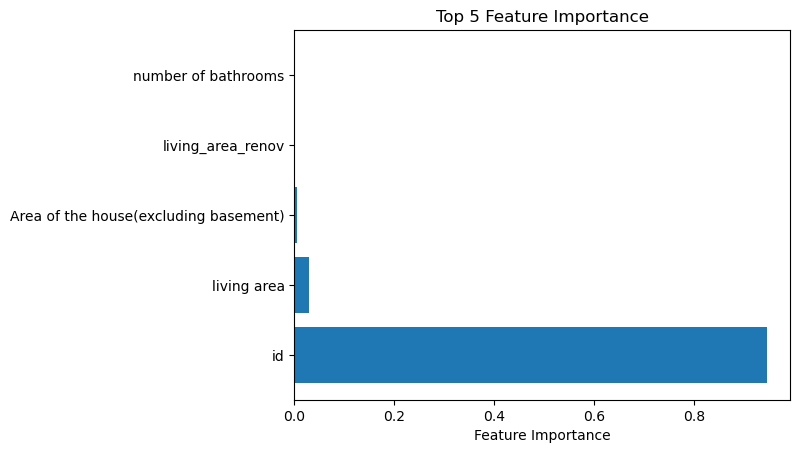

In [83]:
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.title("Top 5 Feature Importance")
plt.xlabel("Feature Importance")
plt.show()

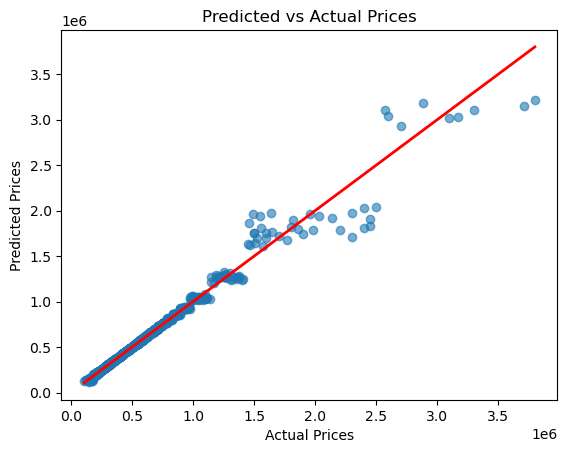

In [85]:
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()